**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Optimal taxation with government consumption](#toc1_)    
- 2. [Problem 2: Labor adjustment costs](#toc2_)    
- 3. [Problem 3: Global optimizer with refined multi-start](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [34]:
from scipy import optimize
from scipy.optimize import minimize_scalar
import sympy as sm
import pandas as pd
from types import SimpleNamespace
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import warnings

## 1. <a id='toc1_'></a>[Problem 1: Optimal taxation with government consumption](#toc0_)


Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility: 

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

where 


* $C$ is *private* consumption with weight $\alpha\in(0,1)$.
* $\kappa > 0$ is the *free private* consumption component.
* $C = (1-\tau)wL$ is the *costly private* consumption component.
* $w > 0 $ is the real wage.
* $\tau \in (0,1)$ is the labor-income tax rate.
* $G > 0 $ is *government* consumption with weight $1-\alpha$.
* $\nu > 0$ is the disutility of labor scaling factor


The baseline parameters are:

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

**Question 1:** Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.

In [2]:
# write your code here

**Question 2:** Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.

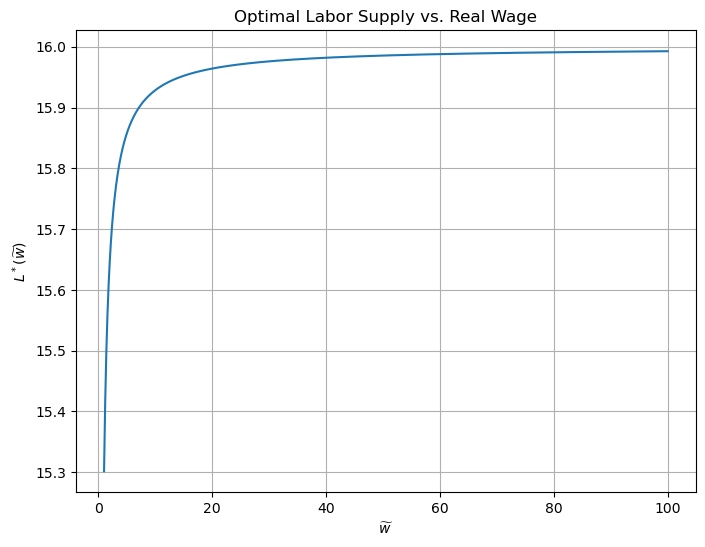

In [3]:
# we first define all of the baseline parameters
alpha = 0.5
kappa = 1.0
nu = 1 / (2 * 16**2)
tau = 0.30
G_values = [1.0, 2.0]
w_values = np.linspace(1, 100, 1000)  # Range of w values for plotting

# We define how we will calculate optimal labor supply L*
def optimal_labor_supply(w):
    tw = (1 - tau) * w
    return (-kappa + np.sqrt(kappa**2 + 4 * alpha / nu * tw**2)) / (2 * tw)

# We set the plot size
plt.figure(figsize=(8, 6))

# We find L_star and plot
L_star = optimal_labor_supply(w_values)

plt.plot(w_values, L_star)
plt.xlabel('$ \widetilde{w} $')
plt.ylabel('$L^*(\widetilde{w})$')
plt.title('Optimal Labor Supply vs. Real Wage')
plt.grid(True)
plt.show()


We see that: 1. Optimal labor supply, L*, is positivly dependent on the wage rate, w, implying that $\frac{\partial L^*(\widetilde{w})}{\partial \widetilde{w}} > 0$. 2. This only continues up until a certain wage level, where we have that: $\frac{\partial L^*(\widetilde{w})}{\partial \widetilde{w}} = 0$.


We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:

$$
G = \tau w L^{\star}((1-\tau)w)
$$

**Question 3:** Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.


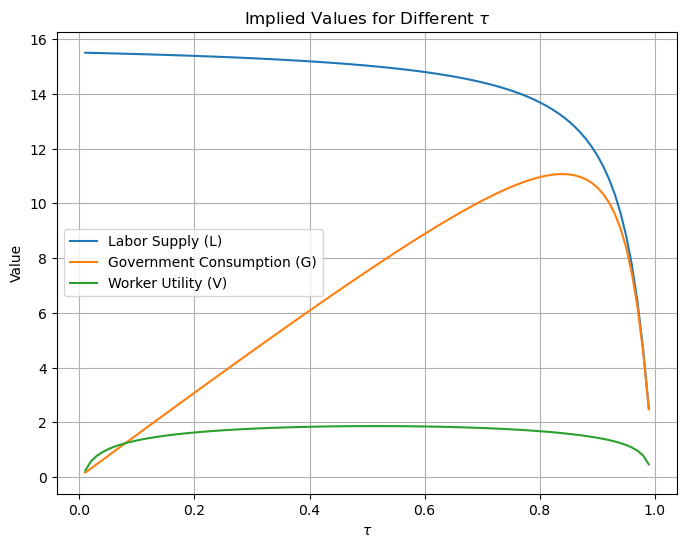

In [36]:
# Remove FutureWarning from append
warnings.simplefilter(action='ignore', category=FutureWarning)

# Initializations
w = 1.0
values = pd.DataFrame(columns=['L_values','U_values', 'G_values', 'tau_values'])

tau_values = np.linspace(0.01, 0.99, 100)  # Grid of tau-values

# Define a utility maximization function
def maximize_utility(w, tau, alpha, kappa, nu):
    # Find optimal labor supply
    L_star = optimal_labor_supply(w)

    # Calculate optimal consumption
    C_star = kappa + (1 - tau) * w * L_star

    # Calculate optimal G
    G_star = tau * w * L_star

    # Calculate utility
    utility = np.log(C_star**alpha * G_star**(1 - alpha)) - nu * (L_star**2) / 2

    return L_star, G_star, utility

# We calculate implied L, G, and worker utility for different tau values and store the results ina DF
for tau in tau_values:
    L_star, G_star, utility = maximize_utility(w, tau, alpha, kappa, nu)
    values = values.append({'L_values': L_star, 'U_values': utility, 'G_values': G_star, 'tau_values': tau}, ignore_index=True)

# We plot L, G, and worker utility against tau
plt.figure(figsize=(8, 6))
plt.plot(values['tau_values'], values['L_values'], label='Labor Supply (L)')
plt.plot(values['tau_values'], values['G_values'], label='Government Consumption (G)')
plt.plot(values['tau_values'], values['U_values'], label='Worker Utility (V)')
plt.xlabel('$\\tau$')
plt.ylabel('Value')
plt.title('Implied Values for Different $\\tau$')
plt.legend()
plt.grid(True)
plt.show()

**Question 4:** Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.

In [30]:
# defining optimal values
max_G = max(values['G_values'])
max_G_index = max_G_index = values['G_values'].idxmax()
tau = values.loc[max_G_index, 'tau_values']
max_U = values.loc[max_G_index, 'U_values']


Maximum tax revenues: 11.069
Optimal tax rate ($\tau$): 0.842
Maximum worker utility: 1.596


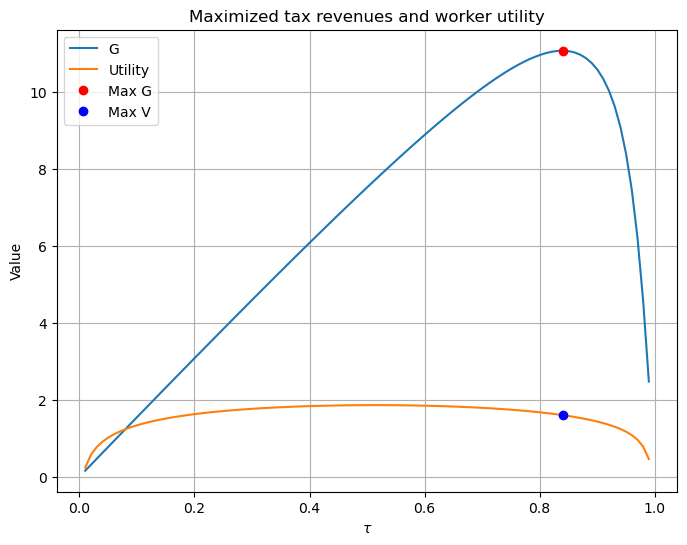

In [37]:
# We find the index of the maximum G value and corresponding tax rate from the previious question
# defining optimal values
max_G = max(values['G_values'])
max_G_index = max_G_index = values['G_values'].idxmax()
tau = values.loc[max_G_index, 'tau_values']
max_U = values.loc[max_G_index, 'U_values']

print(f'Maximum tax revenues: {max_G:.3f}')
print(f'Optimal tax rate ($\\tau$): {tau:.3f}')
print(f'Maximum worker utility: {max_U:.3f}')

# Plotting the result
plt.figure(figsize=(8, 6))

plt.plot(values['tau_values'], values['G_values'], label='G')
plt.plot(values['tau_values'], values['U_values'], label='Utility')
plt.plot(tau, max_G, 'ro', label='Max G')
plt.plot(tau, max_U, 'bo', label='Max V')

plt.xlabel('$\\tau$')
plt.ylabel('Value')
plt.title('Maximized tax revenues and worker utility')
plt.legend()
plt.grid(True)
plt.show()


A more general preference formulation for the worker is:

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

Optimal labor supply is now $L^{\star}(\tilde{w},G)$.

Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

**Question 5:** Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.

*Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.*

In [6]:
# write your code here

**Question 6:** Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.

In [7]:
# write your code here  

## 2. <a id='toc2_'></a>[Problem 2: Labor adjustment costs](#toc0_)

You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.

The wage for each haridresser is $w$.

The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.

Profits are:

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

**Question 1:** Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.

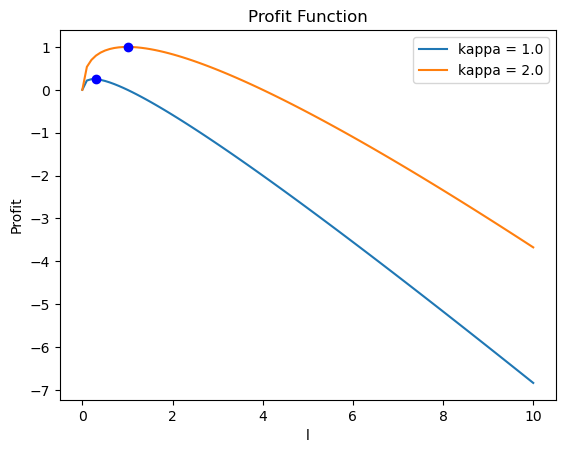

Kappa: 1.0, Optimal l: 0.25
Kappa: 2.0, Optimal l: 1.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the baseline parameters
eta = 0.5
w = 1.0
# Define the range of l values
l_values = np.linspace(0, 10, 100)

# Calculate the profit function for each l value
profit = lambda l, kappa: kappa * l**(1 - eta) - w * l

# Calculate the profit for kappa = 1 and 2
profit_kappa1 = profit(l_values, 1.0)
profit_kappa2 = profit(l_values, 2.0)

# Find the maximum profit and its corresponding l value for kappa = 1
max_profit_kappa1 = np.max(profit_kappa1)
max_l_kappa1 = l_values[np.argmax(profit_kappa1)]

# Find the maximum profit and its corresponding l value for kappa = 2
max_profit_kappa2 = np.max(profit_kappa2)
max_l_kappa2 = l_values[np.argmax(profit_kappa2)]

# Plot the profit function for kappa = 1 and 2
plt.plot(l_values, profit_kappa1, label='kappa = 1.0')
plt.plot(l_values, profit_kappa2, label='kappa = 2.0')

# Mark the maximum point
plt.plot(max_l_kappa1, max_profit_kappa1, 'bo')
plt.plot(max_l_kappa2, max_profit_kappa2, 'bo')

# Set the x-axis and y-axis labels
plt.xlabel('l')
plt.ylabel('Profit')

# Set the title of the plot
plt.title('Profit Function')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

# Define the kappa values
kappa_values = np.array([1.0, 2.0])

# Calculate the optimal l for each kappa value
optimal_l_values = ((1 - eta) * kappa_values / w) ** (1 / eta)

# Print the optimal l values
for kappa, l in zip(kappa_values, optimal_l_values):
    print(f'Kappa: {kappa}, Optimal l: {l}')

From the profit function showed in the figure, we see that profit is maximized when l is approx 0,25 when kappa is equal to 1, furthermore we see that when kappa is equal to 2, profit is maximized when l is approx 1. When this is compared with the values calculated from the function given, we see that these values correspond to each other.

We now consider a *dynamic* version of the model.

* The demand-shock is a so-called AR(1) in logs, 

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.
* Future profits are discounted with a monthly factor of $R \in (0,1)$.

The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$


The *ex post* value of the salon is *conditional* on the shock series is:

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

The *ex ante* expected value of the salon can be approximated by

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.


Baseline parameters are: 

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

**Question 2:** Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.

In [9]:
# write your code here 

Next, we consider policies on the form:

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.



**Question 3:** Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?

In [10]:
# write your code here

**Question 4:** Find the optimal $\Delta$ maximizing $H$. Illustrate your result.

In [11]:
# write your code here


**Question 5:** Suggest an alternative policy you believe might improve profitability. Implement and test your policy.



In [12]:
# write your code here

## 3. <a id='toc3_'></a>[Problem 3: Global optimizer with refined multi-start](#toc0_)

We consider the Griewank function:

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.

In [13]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start** is:

1. Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.
2. Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.
3. In each iteration for $k \in \{0,1,\dots,K-1\}$:

    A. Draw random $\mathbf{x}^k$ uniformly within chosen bounds.

    B. If $k < \underline{K}$ go to step E.

    C. Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$  

    D. Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $

    E. Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.

    F. Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$

    G. If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.

4. Return the result $\mathbf{x}^{\ast}$.

As settings we choose:

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.

**Question 1:** Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.

In [14]:
# write your code here

**Question 2:** Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?

In [15]:
# write your code here